IA & Data science (LU3IN0226) -- 2019-2020
--------
*&copy; Equipe pédagogique: Gauvain Bourgne, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME05: visualisation et expérimentations

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*MARZOUKI Amine & KHIATI Rezkellah Noureddine*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-05</tt> et rajouter à la suite de <tt>tme-05</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `tme-05-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

<font color="RED" size="+1">**[Q]**</font> **Mise à jour de la librairie `iads`**

En premier lieu, vérifier que votre librairie `iads` est bien à jour : elle doit maintenant contenir toutes les fonctions et classes mises au point et testées dans les tme précédents3. Une fois à jour, importer la librairie pour pouvoir l'utiliser dans ce notebook.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

### Objectifs de ce TME

L'objectif de ce TME est de terminer les implémentations des algorithmes du percetron et des $k$ plus proches voisins, de réaliser un ensemble d'expérimentations pour les comparer, et de mettre en oeuvre des outils de visualisation.

En reprenant la fonction écrite dans les TME précédents, on commence par générer un dataset pour tester les fonctions.

Le dataset généré contient  20 lignes de  2 colonnes.


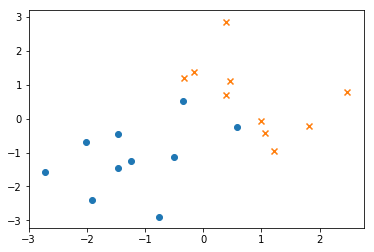

In [2]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Exemple d'utilisation:

data_desc, data_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Le dataset généré contient ", np.shape(data_desc)[0], "lignes de ", np.shape(data_desc)[1], "colonnes.")

# Affichage :
ut.plot2DSet(data_desc,data_label)


## Expérimentations

Pour expérimenter un classifieur, il est nécessaire de posséder deux datasets distincts: 
- le dataset d'apprentissage, qui se compose donc de 2 arrays: `train_desc` et `train_labels`
- et le dataset de test, qui se compose de 2 arrays: `test_desc` et `test_labels`. 


On commence par construire le classifieur avec le dataset d'apprentisage, puis, on évalue sa performance en 2 temps :
- on calcule son **accuracy d'apprentissage** qui est l'accuracy obtenue sur le dataset d'apprentissage 
- on calcule son **accuracy de test** qui est l'accuracy obtenue sur le dataset de test

La première valeur mesure combien le classifieur a surappris les données d'apprentissage, la deuxième valeur mesure sa performance en généralisation.

### Retour sur la validation croisée (correctif)

Le principe (corrigé par rapport à ce qui a été dit dans le TME 04) d'une expérimentation par validation croisée (ou *cross-validation*) est le suivant.

<ol>
    <li>Choisir un algorithme de construction de classifieur à évaluer</li>
    <li>Générer un dataset suffisamment grand. Soit $DS$ ce dataset</li>
    <li>Découper $DS$ en 10 datasets de taille égale tels qu'ils contiennent tous la même proportion d'exemples de chaque classe que $DS$, les exemples pour constituer chacun de ces datasets sont tirés aléatoirement parmi les exemples $DS$ par un tirage <b>sans remise</b>. On appelle $DS0$, $DS1$,..., $DS9$ ces 10 datasets.</li>
    <li>Construire un classifieur : <font color="RED">on prend $DS0$ comme <b>dataset de test</b> et on regroupe les 9 autres datasets $DS1$,...,$DS9$ pour constituer le <b>dataset d'apprentissage</b></font>. Les 9 datasets utilisés pour construire le classifieur servent à évaluer l'accuracy d'apprentissage $accA_0$ et le dataset $DS0$ sert à évaluer l'accuracy de test $accT_0$ de ce classifieur.</li>
    <li>Construire un nouveau classifier en prenant $DS1$ comme dataset de test et les autres datasets $DS0$, $DS2$,...,$DS9$ comme dataset d'apprentissage et évaluer l'accuracy d'apprentissage $accA_1$ et l'accuracy de test $accT_1$ de ce classifieur.</li>
    <li>etc. Chaque dataset $DSi$ sert <b>une fois comme dataset de test</b> et <b>9 fois comme dataset d'apprentissage</b></li>
</ol>
    
Au final, on obtient donc 10 valeurs d'accuracy d'apprentissage et 10 valeurs d'accuracy de test, la performance globale de l'algorithme du classifieur choisi est obtenue en donnant:
- la moyenne des accuracies de test $\frac{1}{10}\sum_{i=0}^{9} accT_i$
- l'écart type des accuracies de test $accT_0$, ..., $accT_{9}$

De même, la moyenne et l'écart type des accuracies d'apprentissage peut être aussi fournie.

*Remarque*: ici, comme on choisit de découper $DS$ en $10$ datasets, on parle de *validation croisée en 10 paquets* (en anglais: *10-folds cross-validation*). Dans d'autres cas, on peut choisir de réaliser un découpage avec un nombre de datasets différents. On parle alors de *validation croisée en m paquets* avec $m$ un nombre entier supérieur ou égal à 2.


<font color="RED" size="+1">**[Q]**</font> Compléter la fonction suivante qui, étant donné un classifieur $C$, un dataset $DS$ (donné sous la forme d'un tuple (descriptions, labels)) et un entier $m$, réalise une validation croisée en $m$ paquets et rend le quadruplet composé de 2 tuples: le premier tuple donne la moyenne et l'écart type d'apprentissage, le second tuple donne la moyenne et l'écart type de test.

<b>Astuce:</b> ne pas dupliquer les dataset : travailler sur des listes d'indices qui sont ensuite utilisées pour requêter les arrays représentant le dataset.

In [2]:
def crossvalidation(C, DS, m=10):
    """ Classifieur * tuple[array, array] * int -> tuple[tuple[float,float], tuple[float,float]]
        Hypothèse: m>0
        Par défaut, m vaut 10
    """
    
    
    ############################ IMPORTANT ####################################
    # 𝐷𝑆1 comme dataset de test et les autres datasets 𝐷𝑆0, 𝐷𝑆3,...,𝐷𝑆9 comme dataset pour apprentissage 
    # each iteration we pick 1 for testing and the others for training
    ###########################################################################
    
    data_desc, data_labels = DS[0], DS[1]
    indices = [i for i in range(len(data_desc))]
    train_accs = []
    test_accs = []
    datasets = []
    
    for i in range(m): # we're not treating the case where m%len(DS) != 0 (if the rest has a size = 1, it'll kill the avg)
        # random tirage
        np.random.shuffle(indices)

        # how much to take in each one
        length = len(data_desc) // m
        XX = [data_desc[i] for i in indices[:length]]
        yy = [data_labels[i] for i in indices[:length]]

        # add it to the list
        datasets.append([XX, yy])
        # remove the first length indices so that we don't take the same description twice
        for j in range(length):
            indices.pop(0)

    datasets = np.asarray(datasets)
    
    # take one for training, the others for testing
    for test_index in range(m):
        train_set = np.concatenate(tuple([datasets[i] for i in range(m) if i != test_index]), axis=1)
        
        C.train(train_set[0], train_set[1])
            
        # append training accuracy to the training_set
        train_accs.append(C.accuracy(train_set[0], train_set[1]))

        # append test accuracy to the test_set
        test_accs.append(C.accuracy(datasets[test_index][0], datasets[test_index][1]))    
        
    print("[Info debug] liste accuracies Apprentissage: ", train_accs)
    print("[Info debug] liste accuracies Test         : ", test_accs)
    train_accs = np.array(train_accs)
    test_accs = np.array(test_accs)
    
    return (train_accs.mean(), train_accs.std()), (test_accs.mean(), test_accs.std())

In [4]:
# Exemple d'utilisation:

# Un autre exemple d'utilisation :
knn = cl.ClassifierKNN(2,1)

res_apprentissage, res_test = crossvalidation(knn, (data_desc, data_label), 10)

print("(moyenne, std) pour apprentissage :", res_apprentissage)
print("(moyenne, std) pour test          :", res_test)

[Info debug] liste accuracies Apprentissage:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[Info debug] liste accuracies Test         :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0]
(moyenne, std) pour apprentissage : (1.0, 0.0)
(moyenne, std) pour test          : (0.9, 0.2)


Le dataset généré contient  400 lignes de  2 colonnes.
[Info debug] liste accuracies Apprentissage:  [0.934375, 0.94375, 0.94375, 0.95, 0.9375]
[Info debug] liste accuracies Test         :  [0.9375, 0.9125, 0.9375, 0.9, 0.925]
(moyenne, std) pour apprentissage : (0.9418749999999999, 0.005448623679425838)
(moyenne, std) pour test          : (0.9225, 0.01457737973711325)


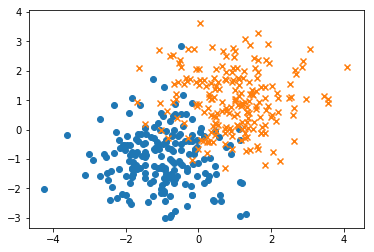

In [5]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Un autre exemple d'utilisation:

autre_desc, autre_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),200)

print("Le dataset généré contient ", np.shape(autre_desc)[0], "lignes de ", np.shape(autre_desc)[1], "colonnes.")

# Affichage :
ut.plot2DSet(autre_desc,autre_label)

# Classifieur :
knn = cl.ClassifierKNN(2,3)

res_apprentissage, res_test = crossvalidation(knn, (autre_desc, autre_label), 5)

print("(moyenne, std) pour apprentissage :", res_apprentissage)
print("(moyenne, std) pour test          :", res_test)

Lorsqu'on compare plusieurs classifieurs, il est intéressant de mesurer leurs performances par une validation croisée, et idéalement, réalisée avec les mêmes datasets.

<font color="RED" size="+1">**[Q]**</font> Réécrire la fonction précédente pour qu'elle prenne en argument non pas un seul classifieur, mais une liste de classifieurs et qu'elle renvoie la liste des quadruplets résultats correspondante.

*Attention*: il ne s'agit pas d'écrire une fonction qui appelle la fonction précédente, il faut la réécrire.

In [3]:
def crossvalidation(LC, DS, m, debug=True):
    """ List[Classifieur] * tuple[array, array] * int ->  List[tuple[tuple[float,float], tuple[float,float]]]
        Hypothèse: m>0
        Par défaut, m vaut 10
    """
    
    data_desc, data_labels = DS[0].copy(), DS[1].copy()
    indices = [i for i in range(len(data_desc))]
    train_accs = []
    test_accs = []
    datasets = []
    
    for i in range(len(LC)):
        train_accs.append([])
        test_accs.append([])
    
    for i in range(m): # we're not treating the case where m%len(DS) != 0 (if the rest has a size = 1, it'll kill the avg)
        # random tirage
        np.random.shuffle(indices)

        # how much to take in each one
        length = len(data_desc) // m
        XX = [data_desc[i] for i in indices[:length]]
        yy = [data_labels[i] for i in indices[:length]]

        # add it to the list
        datasets.append([XX, yy])
        
        # remove the first length indices so that we don't take the same description twice
        for j in range(length):
            indices.pop(0)

    datasets = np.asarray(datasets)
            
    # take one for training, the others for testing
    for test_index in range(m):
        train_set = np.concatenate(tuple([datasets[i] for i in range(m) if i != test_index]), axis=1)
        
        for i in range(len(LC)):
            LC[i].train(train_set[0], train_set[1])

            # append training accuracy to the training_set
            train_accs[i].append(LC[i].accuracy(train_set[0], train_set[1]))

            # append test accuracy to the test_set
            test_accs[i].append(LC[i].accuracy(datasets[test_index][0], datasets[test_index][1]))    
    
    if debug:
        print("Il y a ", len(LC), "classifieurs à comparer.")
        for i in range(len(LC)):
            print("[Info debug] Classifieur   ", i)
            print("[Info debug] liste accuracies Apprentissage: ", train_accs[i])
            print("[Info debug] liste accuracies Test         : ", test_accs[i])
            print()

    for i in range(len(LC)):
        train_accs[i] = np.array(train_accs[i])
        test_accs[i] = np.array(test_accs[i])
    
    returned_values = [((tr.mean(), tr.std()), (ts.mean(), ts.std())) for tr, ts in zip(train_accs, test_accs)]
    
    return returned_values

In [4]:
# Exemple d'utilisation:

# Un autre exemple d'utilisation :
Liste_knns = []
Liste_knns.append(cl.ClassifierKNN(2,1))
Liste_knns.append(cl.ClassifierKNN(2,3))
Liste_knns.append(cl.ClassifierKNN(2,5))

Resultats = crossvalidation(Liste_knns, (autre_desc, autre_label), 10)

print("\n*****\nAffichage des résultats:")
for k in range(0,len(Resultats)):
    print("Classifieur ", k)
    print("\t(moyenne, std) pour apprentissage :", Resultats[k][0])
    print("\t(moyenne, std) pour test          :", Resultats[k][1])


NameError: name 'autre_desc' is not defined

<font color="RED" size="+1">**[Q]**</font> A l'aide d'une validation croisée en 10 paquets réalisée sur un dataset généré aléatoirement, donner les performances (accuracy moyenne et écart type) de tous les classifieurs implémentés depuis le TME 2.

In [5]:
classif_dict = dict()
eps = 10e-3 # learning rate

def compare(X, y, m=10, show_res=True, plot=False):   
    classif_dict['perceptron'] = cl.ClassifierPerceptron(X.shape[1], eps, max_iter=1e3)
    classif_dict['kernel_perceptron'] = cl.ClassifierPerceptronKernel(X.shape[1], eps, ut.KernelPoly())
    classif_dict['perceptronV2'] = cl.ClassifierOneStepPerceptron(X.shape[1])

    k = 3
    while k < 12:
        classif_dict['knnV' + str(k)] = cl.ClassifierKNN(X.shape[1], k)
        k += 2
    Resultats = crossvalidation(list(classif_dict.values()), (X, y), m, debug=False)
    
    def plot_comparaison():
        perf_train = []
        perf_test = []
        classifs = [i for i in range(len(classif_dict))]

        for i in range(len(classif_dict)):
            perf_train.append(Resultats[i][0][0])
            perf_test.append(Resultats[i][1][0])

        plt.figure(figsize=(7, 3))
        plt.plot(classifs, perf_train, label='Training performane')
        plt.plot(classifs, perf_test, label='Testing performane')
        plt.ylabel('Performane')
        plt.xlabel('Classifiers')
        plt.xticks(np.arange(len(classif_dict)), list(classif_dict.keys()), rotation='vertical')
        
        best_index = perf_test.index(max(perf_test))
        names = list(classif_dict.keys())
        
        plt.title("Comparing multiple classifiers\nBest classifier is %s with a test accuracy of %.2f%%" 
                  %(names[best_index], perf_test[best_index]*100))
        plt.legend()
        
    
    if show_res:
        print("\n*****\nAffichage des résultats:")

        i = 0
        for key in classif_dict.keys():
            print("Classifieur ", key)
            print("\t(moyenne, std) pour apprentissage :", Resultats[i][0])
            print("\t(moyenne, std) pour test          :", Resultats[i][1])
            i += 1
            
    if plot:
        plot_comparaison()
        
    return Resultats




*****
Affichage des résultats:
Classifieur  perceptron
	(moyenne, std) pour apprentissage : (0.893611111111111, 0.020677192659940485)
	(moyenne, std) pour test          : (0.89, 0.02783882181415011)
Classifieur  kernel_perceptron
	(moyenne, std) pour apprentissage : (0.9072222222222223, 0.014497764834110997)
	(moyenne, std) pour test          : (0.9025000000000001, 0.028394541729001375)
Classifieur  knnV3
	(moyenne, std) pour apprentissage : (0.9405555555555555, 0.0035572912430182372)
	(moyenne, std) pour test          : (0.9199999999999999, 0.04153311931459036)
Classifieur  knnV5
	(moyenne, std) pour apprentissage : (0.9344444444444445, 0.004157397096415476)
	(moyenne, std) pour test          : (0.925, 0.0370809924354783)
Classifieur  knnV7
	(moyenne, std) pour apprentissage : (0.9352777777777778, 0.003938179688543826)
	(moyenne, std) pour test          : (0.925, 0.03535533905932736)
Classifieur  knnV9
	(moyenne, std) pour apprentissage : (0.9352777777777778, 0.0049767980186580145)
	

[((0.893611111111111, 0.020677192659940485), (0.89, 0.02783882181415011)),
 ((0.9072222222222223, 0.014497764834110997),
  (0.9025000000000001, 0.028394541729001375)),
 ((0.9405555555555555, 0.0035572912430182372),
  (0.9199999999999999, 0.04153311931459036)),
 ((0.9344444444444445, 0.004157397096415476), (0.925, 0.0370809924354783)),
 ((0.9352777777777778, 0.003938179688543826), (0.925, 0.03535533905932736)),
 ((0.9352777777777778, 0.0049767980186580145),
  (0.9225000000000001, 0.0361420807370024)),
 ((0.9263888888888889, 0.00416666666666667), (0.925, 0.0370809924354783))]

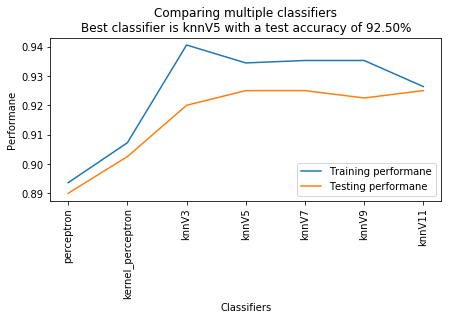

In [13]:
compare(autre_desc, autre_label, plot=True)

### Expérimentations de  classifieurs sur des données réelles

Téléchargez des données réelles (voir les TME précédents) et réalisez un ensemble d'expérimentations permettant de comparer les classifieurs que vous avez implémentés depuis le TME 2. 
Comparez-les en termes d'accuracy, de temps d'exécution,...
Attention, il est donc nécessaire dans cette partie d'inclure des boîtes de code python pour faire les tests mais aussi des boîtes de texte, pour expliquer l'objectif des expériences, ainsi que d'autres boîtes pour commenter les résultats obtenus.

## Expérimentation sur dataset Breast Cancer

In [6]:
df = pd.read_csv('../mldata/breast_cancer.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
print(df.Classification.unique())
print("Labels: 1 = Negative\t2 = Positive")
print()
# 1 is healthy, 2 is sick.
print(df.Classification.value_counts())

[1 2]
Labels: 1 = Negative	2 = Positive

2    64
1    52
Name: Classification, dtype: int64


### Transforming the data <br> 1 to -1 and 2 -> 1

In [8]:
df['Classification'].replace(1, -1, inplace=True)
df['Classification'].replace(2, 1, inplace=True)

In [9]:
df.Classification.value_counts()

 1    64
-1    52
Name: Classification, dtype: int64

### Checking for null values

In [10]:
df.isnull().values.any()

False

### Pre-processing the data to work with our code.

In [11]:
cancer_data = df.loc[:, df.columns != 'Classification'].to_numpy()
cancer_label = df.loc[:, df.columns == 'Classification'].to_numpy()

In [12]:
cancer_data

array([[ 48.        ,  23.5       ,  70.        , ...,   9.7024    ,
          7.99585   , 417.114     ],
       [ 83.        ,  20.69049454,  92.        , ...,   5.429285  ,
          4.06405   , 468.786     ],
       [ 82.        ,  23.12467037,  91.        , ...,  22.43204   ,
          9.27715   , 554.697     ],
       ...,
       [ 65.        ,  32.05      ,  97.        , ...,  22.54      ,
         10.33      , 314.05      ],
       [ 72.        ,  25.59      ,  82.        , ...,  33.75      ,
          3.27      , 392.46      ],
       [ 86.        ,  27.18      , 138.        , ...,  14.11      ,
          4.35      ,  90.09      ]])

In [13]:
cancer_label[:3]

array([[-1],
       [-1],
       [-1]])

In [17]:
compare(cancer_data, cancer_label, show_res=False, plot=True)

numpy.ndarray

In [ ]:
X = cancer_data
y = cancer_label
new_w = np.linalg.inv(np.matmul(X.T, X))
new_w = np.matmul(new_w, X.T)
new_w = np.matmul(new_w, y)
w = np.reshape(new_w, (1, new_w.shape[0]))[0]
w

In [ ]:
w = np.linalg.lstsq(np.matmul(X.T, X), np.matmul(X.T, y), rcond=None)
w = np.reshape(w[0], (1, w[0].shape[0]))[0]
w

## Heatmap des correlations entre les features

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar = True,  annot=True, fmt= '.2f', cmap= 'coolwarm')
plt.title('Matrice de correlations')

In [ ]:
try:
    del df['HOMA']
except KeyError:
    pass

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar = True,  annot=True, fmt= '.2f', cmap= 'coolwarm')
plt.title('Matrice de correlations')

In [ ]:
compare(cancer_data, cancer_label, m = 10, show_res=False, plot=True)

In [ ]:
compare(cancer_data, cancer_label, m = 10, show_res=False, plot=True)

## Visualisation des données

Lorsque les données sur lesquelles on travaille possèdent plus de 2 dimensions, il n'est pas facile de les visualiser simplement comme on a pu le faire dans les séances précédentes en utilisant un plot.

Une façon de mieux visualiser ces données peut être d'utiliser les outils d'un package de visualisation.

Le package <code>seaborn</code> est très pratique (vous pouvez consulter la documentation sur le web) et généralement installé dans l'environnement Python.

Pour travailler avec `seaborn`, on a besoin de mettre notre dataset dans un `DataFrame` pandas, cela se fait très facilement (cf. la doc pandas):

In [ ]:
# On commence par créer un dataframe avec les descriptions :
df = pd.DataFrame(autre_desc, columns= ["X", "Y"])

# puis on rajoute à notre dataframe une nouvelle colonne contenant les labels de chaque exemple :
df['label'] = autre_label

# Affichage du dataframe obtenu:
df

Nous utilisons ici la fonction <code>pairplot</code> du package `seaborn` pour construire un corrélogramme qui affiche les corrélations des dimensions prises 2 à 2.

In [ ]:
sns.pairplot(df)

# Eventuellement, mais pas nécessairement utile:
#sns.plt.show()

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `cree_dataframe()` qui, étant donné un dataset (un tuple contenant un array avec les description et un array avec les labels correspondant) et une liste de chaîne de caractères donnant les noms des variables correspondant à chaque colonne de la description, ainsi qu'une chaîne de caractères donnant le nom pour la colonne label à donner dans le dataframe créé (ce dernier argument étant optionnel est mis à la chaîne "label" par défaut), rend le dataframe correspondant.

In [ ]:
# ------------------------ A COMPLETER :
def cree_dataframe(DS, L_noms, Nom_label = "label"):
    """ Dataset * List[str] * Str -> DataFrame
        Hypothèse: la liste à autant de chaînes que la description a de colonnes
    """
    
    raise NotImplementedError("Please Implement this method")


In [ ]:
cree_dataframe((autre_desc,autre_label),["X", "Y"])

In [ ]:
df_data = cree_dataframe((data_desc,data_label),["Abscisse", "Ordonnée"], 'classe')
df_data

In [ ]:
sns.pairplot(df_data)

Un autre exemple, qui utilise un dataset classique en apprentissage: le dataset des iris de Fisher  (voir par exemple : https://fr.wikipedia.org/wiki/Iris_de_Fisher) dont les exemples sont décrits par 4 variables et sont associés à l'une des 3 classes possibles ('setosa', 'virginica' et 'versicolor').

In [ ]:
# Le dataset des iris est fourni dans le package seaborn, on l'obtient ainsi:
df_iris = sns.load_dataset('iris')

# On peut alors construire le corrélogramme de ce dataset:
sns.pairplot(df_iris)



In [ ]:
df_iris['species']

<font color="RED" size="+1">**[Q]**</font> Utiliser le package `seaborn` ainsi que les fonctions statistiques vues lors du TME 1 pour afficher tout un ensemble de résultats permettant d'analyser la base des Iris de Fisher. 

<font color="RED" size="+1">**[Q]**</font> Afin de pouvoir utiliser vos classifieurs sur la base des Iris, il est nécessaire de l'adapter : ce dataset contient 3 classes (qui sont des chaînes) alors que nos classifieurs sont binaires (et travaillent sur les labels -1 et +1).
Le moyen le plus simple est de réaliser un encodage "one hot" :
- choisir une classe et lui donner le label +1
- toutes les autres classes sont alors associées au label -1

Mettre au point une série d'expérimentation pour tester vos algorithmes sur la base des iris en utilisant ce codage.